# Twitter Sentiment Analysis
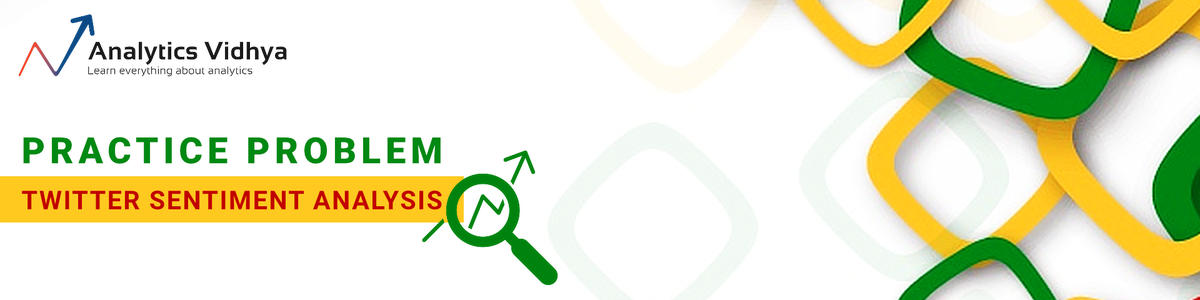

In [63]:
import os
import gc
os.chdir('E:/Anupam/HomeDocs/DataScience/ExternalAssignments/NLP/Twitter Sentiment Analysis/')
model_dir = 'E:/Anupam/HomeDocs/DataScience/ExternalAssignments/NLP/Twitter Sentiment Analysis/Model/'
import warnings
warnings.filterwarnings("ignore")
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [64]:
model_dir

'E:/Anupam/HomeDocs/DataScience/ExternalAssignments/NLP/Twitter Sentiment Analysis/Model/'

In [65]:
import numpy as np
import pandas as pd
#import matplotlib as mpl
#import matplotlib.pyplot as plt
#% matplotlib inline
import nltk
#import pandas_profiling
import re
import tensorflow as tf
import tensorflow.keras as keras
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

In [66]:
train_dataset = pd.read_csv ('Dataset/Train.csv')
test_dataset = pd.read_csv ('Dataset/Test.csv')
train_dataset.head()

,id,label,tweet
0,1,0,@user when a father is dysfunctional and is s...
1,2,0,@user @user thanks for #lyft credit i can't us...
2,3,0,bihday your majesty
3,4,0,#model i love u take with u all the time in ...
4,5,0,factsguide: society now #motivation


In [6]:
train_dataset.tweet[15846]

"today's lunchð\x9f\x98\x8b #thankyou #thankful #lunch #yum #yummy   #ayutthaya #ã\x82¿ã\x82¤ã\x83©ã\x83³ã\x83\x89 #ã\x83\x90ã\x83³ã\x82³ã\x82¯ #ã\x82¢ã\x83¦ã\x82¿ã\x83¤ #ã\x82¿ã\x82¤ #ã\x83©ã\x83³ã\x83\x81 #å¹¸ã\x81\x9b #æ\x84\x9fè¬\x9d #ç¾\x8eå\x91³ã\x81\x97ã\x81\x84 "

In [7]:
# Lets merge the two datasets for data cleansing
combined_dataset = train_dataset.append(test_dataset, ignore_index=True)
combined_dataset.head()

,id,label,tweet
0,1,0.0,@user when a father is dysfunctional and is s...
1,2,0.0,@user @user thanks for #lyft credit i can't us...
2,3,0.0,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation


## Data Cleansing

In [8]:
def remove_pattern(input_txt, pattern):
    text_to_be_subs = re.findall(pattern, input_txt)
    for i in text_to_be_subs:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt    

In [9]:
# Create a new column for clean tweet. remove twitter handles (@user)
combined_dataset['tidy_tweet'] = np.vectorize(remove_pattern)(combined_dataset['tweet'], "@[\w]*")
combined_dataset.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for #lyft credit i can't use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,#model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide: society now #motivation


In [10]:
# remove special characters, numbers, punctuations
combined_dataset['tidy_tweet'] = combined_dataset['tidy_tweet'].str.replace("[^a-zA-Z]", " ")
combined_dataset.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when a father is dysfunctional and is so sel...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks for lyft credit i can t use cause th...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,model i love u take with u all the time in ...
4,5,0.0,factsguide: society now #motivation,factsguide society now motivation


In [11]:
#Removing Short Wordslike he, she, you etc
combined_dataset['tidy_tweet'] = combined_dataset['tidy_tweet'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
combined_dataset.head()

,id,label,tweet,tidy_tweet
0,1,0.0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...
1,2,0.0,@user @user thanks for #lyft credit i can't us...,thanks lyft credit cause they offer wheelchair...
2,3,0.0,bihday your majesty,bihday your majesty
3,4,0.0,#model i love u take with u all the time in ...,model love take with time
4,5,0.0,factsguide: society now #motivation,factsguide society motivation


In [12]:
combined_dataset.tidy_tweet[15846]

'today lunch thankyou thankful lunch yummy ayutthaya'

#### Split the label and the tweets

In [21]:
train_reviews = combined_dataset.iloc[:train_dataset.shape[0],].tidy_tweet
test_reviews = combined_dataset.iloc[train_dataset.shape[0]:,].tidy_tweet
combined_reviews = combined_dataset.tidy_tweet
sentiment = train_dataset.label
test_reviews

31962    studiolife aislife requires passion dedication...
31963    white supremacists want everyone birds movie here
31964    safe ways heal your acne altwaystoheal healthy...
31965    cursed child book reservations already where w...
31966    bihday amazing hilarious nephew ahmir uncle da...
31967                                       choose momtips
31968    something inside dies eyes ness smokeyeyes tir...
31969           finished tattoo inked loveit thanks aleeee
31970    will never understand left when young deep int...
31971    delicious food lovelife capetown mannaepicure ...
31972    dayswasted narcosis infinite make aware grindi...
31973         world greatest spoing events lemans teamaudi
31974               half through website allgoingwell very
31975    good food good life enjoy this called garlic b...
31976    stand behind this guncontrolplease senselesssh...
31977    jamaisasthi fish curry prawn hilsa foodfestiva...
31978                     limited edition rain shine tod

In [52]:
type(train_reviews)

pandas.core.series.Series

In [22]:
sentiment_list = train_dataset.label.tolist()
train_reviews_list = train_reviews.tolist()
test_reviews_list = test_reviews.tolist()
test_reviews_list

['studiolife aislife requires passion dedication willpower find newmaterials',
 'white supremacists want everyone birds movie here',
 'safe ways heal your acne altwaystoheal healthy healing',
 'cursed child book reservations already where when harrypotter pottermore favorite',
 'bihday amazing hilarious nephew ahmir uncle dave loves misses',
 'choose momtips',
 'something inside dies eyes ness smokeyeyes tired lonely grunge',
 'finished tattoo inked loveit thanks aleeee',
 'will never understand left when young deep inthefeels',
 'delicious food lovelife capetown mannaepicure resturant',
 'dayswasted narcosis infinite make aware grinding neuro bass lifestyle',
 'world greatest spoing events lemans teamaudi',
 'half through website allgoingwell very',
 'good food good life enjoy this called garlic bread iloveit',
 'stand behind this guncontrolplease senselessshootings taketheguns comicrelief stillsad',
 'jamaisasthi fish curry prawn hilsa foodfestival foodies',
 'limited edition rain sh

In [23]:
sentiment_list = tf.keras.utils.to_categorical(sentiment, num_classes = 2)

## Tokenization
Now that the texthas been cleaned, lets tokenize the tweets

In [24]:
tokenizer = tf.keras.preprocessing.text.Tokenizer(num_words = vocab_size)
tokenizer.fit_on_texts(combined_reviews)

In [25]:
tokenizer.word_index

{'love': 1,
 'this': 2,
 'with': 3,
 'that': 4,
 'happy': 5,
 'your': 6,
 'have': 7,
 'just': 8,
 'will': 9,
 'when': 10,
 'what': 11,
 'life': 12,
 'time': 13,
 'like': 14,
 'today': 15,
 'from': 16,
 'thankful': 17,
 'positive': 18,
 'people': 19,
 'bihday': 20,
 'good': 21,
 'about': 22,
 'they': 23,
 'more': 24,
 'smile': 25,
 'father': 26,
 'want': 27,
 'healthy': 28,
 'take': 29,
 'work': 30,
 'weekend': 31,
 'summer': 32,
 'there': 33,
 'make': 34,
 'family': 35,
 'beautiful': 36,
 'days': 37,
 'great': 38,
 'here': 39,
 'need': 40,
 'best': 41,
 'friday': 42,
 'only': 43,
 'friends': 44,
 'bull': 45,
 'first': 46,
 'going': 47,
 'really': 48,
 'music': 49,
 'world': 50,
 'their': 51,
 'morning': 52,
 'wait': 53,
 'know': 54,
 'back': 55,
 'fathersday': 56,
 'tomorrow': 57,
 'trump': 58,
 'been': 59,
 'very': 60,
 'week': 61,
 'some': 62,
 'cute': 63,
 'orlando': 64,
 'being': 65,
 'happiness': 66,
 'never': 67,
 'right': 68,
 'feel': 69,
 'think': 70,
 'model': 71,
 'much': 72,

In [26]:
vocab_size = 5000
max_review_length = max([len(txt) for txt in combined_dataset.tidy_tweet])
max_review_length

124

In [27]:
#Converting docs to TF-IDF Matrix
train_reviews_tfidf_matrix = tokenizer.texts_to_matrix(train_reviews_list, mode = 'tfidf')
test_reviews_tfidf_matrix = tokenizer.texts_to_matrix(test_reviews_list, mode = 'tfidf')
train_reviews_tfidf_matrix

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

## Random Forest
https://medium.com/coinmonks/solving-twitter-sentiment-analysis-problem-on-analytics-vidhya-ea3e51eea521

In [28]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

count_vect = CountVectorizer(stop_words='english')
transformer = TfidfTransformer(norm='l2',sublinear_tf=True)

## for transforming the whole train data ##
train_counts = count_vect.fit_transform(train_reviews)
print(train_counts)
train_tfidf = transformer.fit_transform(train_counts)

## for transforming the test data ##
test_counts = count_vect.transform(test_reviews)
test_tfidf = transformer.transform(test_counts)
train_tfidf

  (0, 9099)	1
  (0, 16704)	1
  (0, 8823)	1
  (0, 27220)	1
  (0, 9100)	1
  (0, 10481)	1
  (1, 12222)	1
  (1, 8294)	1
  (1, 32785)	1
  (1, 33861)	1
  (1, 21969)	1
  (1, 5018)	1
  (1, 6947)	1
  (1, 18509)	1
  (1, 30742)	1
  (2, 18696)	1
  (2, 3115)	1
  (3, 31293)	1
  (3, 18203)	1
  (3, 19932)	1
  (4, 20212)	1
  (4, 28484)	1
  (4, 10261)	1
  (5, 792)	1
  (5, 8411)	1
  :	:
  (31958, 5515)	1
  (31958, 27656)	1
  (31958, 18910)	1
  (31958, 568)	1
  (31958, 21375)	1
  (31958, 32121)	1
  (31958, 15070)	1
  (31958, 12152)	1
  (31958, 13901)	1
  (31958, 27486)	1
  (31958, 32028)	1
  (31958, 34483)	1
  (31958, 17695)	1
  (31959, 17831)	1
  (31959, 28614)	1
  (31959, 34375)	1
  (31959, 20151)	1
  (31959, 20016)	1
  (31960, 6346)	1
  (31960, 4577)	1
  (31960, 32766)	1
  (31960, 27883)	1
  (31960, 30603)	1
  (31961, 11235)	1
  (31961, 30731)	1


<31962x35049 sparse matrix of type '<class 'numpy.float64'>'
	with 191702 stored elements in Compressed Sparse Row format>

In [29]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 50)
## fitting the model on the transformed train data ##
model.fit(train_tfidf,sentiment)

## predicting the results ##
predictions = model.predict(test_tfidf)

In [30]:
test_reviews_tfidf_matrix.shape

(17197, 5000)

In [31]:
y_pred = model.predict(test_tfidf)
y_pred

array([0, 1, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
test_dataset['label'] = y_pred

In [33]:
# Output the Dataframe into a CSV file
test_dataset[['id', 'label']].to_csv('Submission_Anupam_RF.csv',  index = False)
test_dataset.drop('label', axis = 1, inplace = True)

## Model Development

In [34]:
#Define hyper parameters
training_epochs = 30
learning_rate = 0.003
batch_size = 100
dropout_rate = 0.4

#No of Nodes in hidden layer(hl)
n_nodes_hl1 = 500
n_nodes_hl2 = 300
n_nodes_hl3 = 200
n_nodes_hl4 = 100

#No of output classes for classification problems
n_classes = 2

In [35]:
sentiment.shape

(31962,)

In [36]:
#tf.get_default_graph().finalize()

In [37]:
#Reset the graph
tf.reset_default_graph()

In [38]:
#Build the model. Our graph is sequential
model = keras.Sequential()
#Add the input layer
model.add(tf.keras.layers.InputLayer(input_shape = (train_reviews_tfidf_matrix.shape[1],)))
#Normalize the data
model.add(tf.keras.layers.BatchNormalization())
#Add first layer
model.add(tf.keras.layers.Dense(n_nodes_hl1, activation = 'relu'))
#keras.layers.Dropout(dropout_rate)
#Add second layer
model.add(tf.keras.layers.Dense(n_nodes_hl2, activation = 'relu'))
keras.layers.Dropout(dropout_rate)
#Add third layer
model.add(tf.keras.layers.Dense(n_nodes_hl2, activation = 'relu'))
#keras.layers.Dropout(dropout_rate)
#Add fourth layer
model.add(tf.keras.layers.Dense(n_nodes_hl2, activation = 'relu'))
keras.layers.Dropout(dropout_rate)
#Add the output layer
model.add(tf.keras.layers.Dense(n_classes, activation = 'sigmoid'))


In [39]:
optimizer = tf.train.AdamOptimizer()
model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
batch_normalization (BatchNo (None, 5000)              20000     
_________________________________________________________________
dense (Dense)                (None, 500)               2500500   
_________________________________________________________________
dense_1 (Dense)              (None, 300)               150300    
_________________________________________________________________
dense_2 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_3 (Dense)              (None, 300)               90300     
_________________________________________________________________
dense_4 (Dense)              (None, 2)                 602       
Total params: 2,852,002
Trainable params: 2,842,002
Non-trainable params: 10,000
_____________________________________________________________

In [ ]:
history = model.fit(train_reviews_tfidf_matrix, sentiment_list, epochs = training_epochs, validation_split = 0.20,  verbose = 1, \
                    batch_size = batch_size)

In [ ]:
print('Minimum Loss is: ', min(history.history['loss']))
print('Maximum Training Accuracy: ', max(history.history['acc']))
print('Maximum Test Accuracy: ', max(history.history['val_acc']))

In [37]:
y_pred =  np.argmax(model.predict(test_reviews_tfidf_matrix), axis = 1)

In [38]:
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [39]:
test_dataset['label'] = y_pred

In [40]:
# Output the Dataframe into a CSV file
test_dataset[['id', 'label']].to_csv('Submission_Anupam_NN.csv',  index = False)
test_dataset.drop('label', axis = 1, inplace = True)

# LSTM Model

In [41]:
train_sequence = tokenizer.texts_to_sequences(train_reviews_list)
test_sequence = tokenizer.texts_to_sequences(test_reviews_list)
#Show the 1st review sequence
print(test_reviews_list[0])
print('1st Review = ', len(train_sequence[0]))
print('No of words in 7st Review = ', len(train_sequence[6]))

studiolife aislife requires passion dedication willpower find newmaterials
1st Review =  5
No of words in 7st Review =  3


In [42]:
display(train_reviews_list[0])
train_sequence[0]

'when father dysfunctional selfish drags kids into dysfunction'

[10, 26, 2572, 158, 165]

In [43]:
tokenizer.word_index['dysfunction']

9117

In [44]:
#Using pad_sequences
train_sequence = tf.keras.preprocessing.sequence.pad_sequences(train_sequence, padding='post', truncating = 'post', maxlen = max_review_length)
test_sequence = tf.keras.preprocessing.sequence.pad_sequences(test_sequence, padding='post', truncating = 'post', maxlen = max_review_length)

print('Number of words in review# 1: ', train_sequence[0])
print('Number of words in review# 7: ', test_sequence[6])

Number of words in review# 1:  [  10   26 2572  158  165    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0]
Number of words in review# 7:  [ 195  722 1207  541  965  400  621 2675    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0    0    

#### Build Word2Vec Vector

In [45]:
#List to hold all words in each review
combined_documents = []

#Iterate over each review
for doc in train_reviews:
    combined_documents.append(doc.split(' '))
    
#Iterate over each review
for doc in test_reviews:
    combined_documents.append(doc.split(' '))

print(len(combined_documents))
print(combined_documents[0])

49159
['when', 'father', 'dysfunctional', 'selfish', 'drags', 'kids', 'into', 'dysfunction']


In [46]:
#Convert Sequence into Word2Vec
import gensim

#Build the Word2Vec
word2vec_combined_model = gensim.models.Word2Vec (
    combined_documents, #Word list
    min_count = 10, #Ignore all words with total frequency lower than this                           
    workers = 4, #Number of CPU Cores
    size = 50,  #Embedding size
    window = 5, #Maximum Distance between current and predicted word
    iter = 10   #Number of iterations over the text corpus
    )

In [47]:
word2vec_combined_model.wv.vocab

{'when': <gensim.models.keyedvectors.Vocab at 0x4700e278>,
 'father': <gensim.models.keyedvectors.Vocab at 0x1618e2e8>,
 'selfish': <gensim.models.keyedvectors.Vocab at 0x1618e278>,
 'kids': <gensim.models.keyedvectors.Vocab at 0x4704c828>,
 'into': <gensim.models.keyedvectors.Vocab at 0x470ce908>,
 'thanks': <gensim.models.keyedvectors.Vocab at 0x470f7400>,
 'credit': <gensim.models.keyedvectors.Vocab at 0x470f7438>,
 'cause': <gensim.models.keyedvectors.Vocab at 0x470f7470>,
 'they': <gensim.models.keyedvectors.Vocab at 0x470f74a8>,
 'offer': <gensim.models.keyedvectors.Vocab at 0x470f74e0>,
 'bihday': <gensim.models.keyedvectors.Vocab at 0x470f7518>,
 'your': <gensim.models.keyedvectors.Vocab at 0x470f7550>,
 'majesty': <gensim.models.keyedvectors.Vocab at 0x470f7588>,
 'model': <gensim.models.keyedvectors.Vocab at 0x470f75c0>,
 'love': <gensim.models.keyedvectors.Vocab at 0x470f75f8>,
 'take': <gensim.models.keyedvectors.Vocab at 0x470f7630>,
 'with': <gensim.models.keyedvectors.Vo

In [48]:
combined_embedding_vector_length = word2vec_combined_model.wv.syn0.shape[1]  #Embedding size
print(combined_embedding_vector_length)

#Build an empty matrix for all the top_words. We need to add 1 extra rows as the pad_sequence added 1 extra row
combined_embedding_matrix = np.zeros((vocab_size + 1, combined_embedding_vector_length))
combined_embedding_matrix.shape

50


(5001, 50)

#### Build Embedding Matrix

In [51]:
#Loop over all the words in tokenizer vocablury
for word, i in sorted(tokenizer.word_index.items(), key = lambda x:x[1]):
    #Ignore words which are not in top words 
    if i > vocab_size:
        break
    #Check for words in Word2Vec model
    if word in word2vec_combined_model.wv.vocab:
        combined_embedding_vector = word2vec_combined_model.wv[word]
        combined_embedding_matrix[i] = train_embedding_vector

NameError: name 'train_embedding_vector' is not defined

In [50]:
train_embedding_matrix[5]

NameError: name 'train_embedding_matrix' is not defined

#### Build the Graph

In [301]:
#Define hyper parameters
training_epochs = 1
batch_size = 128
dropout_rate = 0.2
#No of Nodes in hidden layer(hl)
n_nodes_hl1 = 64

#No of output classes for classification problems
n_classes = 1

In [302]:
#Reset the graph
tf.reset_default_graph()
sess = tf.InteractiveSession()

In [303]:
lstm_model = tf.keras.models.Sequential()

#Add Embedding layer
lstm_model.add(tf.keras.layers.Embedding(vocab_size + 1,   #Index values to expect
                                    combined_embedding_vector_length, #Embedding size
                                    input_length = max_review_length, #Length of each review
                                    weights = [combined_embedding_matrix], #Pre-trained embeddings
                                    trainable = True)
         )
#Add LSTM Layers
lstm_model.add(tf.keras.layers.LSTM(n_nodes_hl1, dropout = dropout_rate, recurrent_dropout = dropout_rate))
#Output layer
lstm_model.add(tf.keras.layers.Dense(n_classes, activation='sigmoid'))

In [304]:
#Compile the model
optimizer = tf.train.AdamOptimizer()
lstm_model.compile(optimizer = optimizer, loss = 'binary_crossentropy', metrics = ['accuracy'])

#### Train the model

In [305]:
test_sequence.shape

(17197, 300)

In [306]:
#Train the model
history = lstm_model.fit(train_sequence, sentiment_list, validation_split = 0.2, epochs = training_epochs, batch_size = batch_size)

Train on 25569 samples, validate on 6393 samples
Epoch 1/1
25569/25569 [==============================] - 161s 6ms/step - loss: 0.2854 - acc: 0.9274 - val_loss: 0.2524 - val_acc: 0.9305


In [307]:
print('Minimum Loss is: ', min(history.history['loss']))
print('Maximum Training Accuracy: ', max(history.history['acc']))
print('Maximum Test Accuracy: ', max(history.history['val_acc']))

Minimum Loss is:  0.2853507240622626
Maximum Training Accuracy:  0.9274121005765721
Maximum Test Accuracy:  0.9305490374695653


In [308]:
y_pred =  np.argmax(lstm_model.predict(test_sequence), axis = 1)
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [309]:
test_dataset['label'] = y_pred

In [310]:
# Output the Dataframe into a CSV file
test_dataset[['id', 'label']].to_csv(model_dir + 'Submission_Anupam_LSTM.csv',  index = False)
test_dataset.drop('label', axis = 1, inplace = True)